In [212]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization , Dropout
from keras import models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [213]:
path='/content/drive/MyDrive/AIP/Assignment-1'
train_path=path+'/train_data/'
test_path=path+'/test_data/'

In [214]:
subdir=os.listdir(path+'/train_data')
train_subdir=[x for x in subdir if 'train' in x]
test_subdir=[x.replace('train','test') for x in train_subdir]

In [215]:
x_train = []
y_train=[]
#loading train images from folders and find features using model
for idx, dirname in tqdm(enumerate(train_subdir)):
    filenames=os.listdir(path+'/train_data/'+dirname)
    for i, fname in enumerate(filenames):
        if('.jpg' not in fname):
          continue
        img_path=path+'/train_data/'+dirname+'/'+fname
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        #img_data = np.expand_dims(img_data, axis=0)
        #img_data = preprocess_input(img_data)
        x_train.append(img_data)
        y_train.append(idx)
    print(dirname)

1it [00:00,  4.82it/s]

Albatross_train


2it [00:00,  4.04it/s]

American_Goldfinch_train


3it [00:00,  3.73it/s]

anthuriam_train


4it [00:01,  3.71it/s]

frangipani_train


5it [00:01,  3.57it/s]

Marigold_train


6it [00:01,  3.70it/s]

Red_headed_Woodpecker_train


In [216]:
x_test = []
y_test=[]
#loading test images from folders and find features using model
for idx, dirname in tqdm(enumerate(test_subdir)):
    filenames=os.listdir(path+'/test_data/'+dirname)
    for i, fname in enumerate(filenames):
        if('.jpg' not in fname):
          continue
        img_path=path+'/test_data/'+dirname+'/'+fname
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        #img_data = np.expand_dims(img_data, axis=0)
        #img_data = preprocess_input(img_data)
        x_test.append(img_data)
        y_test.append(idx)
    print(dirname)

1it [00:00,  8.65it/s]

Albatross_test


2it [00:00,  7.85it/s]

American_Goldfinch_test


3it [00:00,  7.08it/s]

anthuriam_test


4it [00:00,  6.83it/s]

frangipani_test


5it [00:00,  6.71it/s]

Marigold_test


6it [00:00,  7.03it/s]

Red_headed_Woodpecker_test


In [217]:
x_train,x_test,y_train,y_test=np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [218]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

[0. 0. 0. 0. 1. 0.]


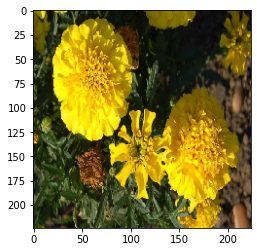

In [219]:
i=99
plt.imshow(x_test[i]/255,cmap='gray')
print(y_test[i])

In [220]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [221]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (224,224,3), filters = 50, kernel_size = (5,5)))
    model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (5,5)))
    # model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (5,5)))
    model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3)))
    # model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3)))
    model.add(Activation('relu'))
    # model.add(Conv2D(filters = 50, kernel_size = (3,3)))
    # model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

model = deep_cnn()

history = model.fit(x_train,y_train, epochs = 10,batch_size=20, verbose = 2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
12/12 - 2s - loss: 2.9332 - accuracy: 0.4583 - 2s/epoch - 188ms/step
Epoch 2/10
12/12 - 1s - loss: 0.9742 - accuracy: 0.8083 - 1s/epoch - 110ms/step
Epoch 3/10
12/12 - 1s - loss: 0.7568 - accuracy: 0.8583 - 1s/epoch - 110ms/step
Epoch 4/10
12/12 - 1s - loss: 0.9272 - accuracy: 0.8458 - 1s/epoch - 110ms/step
Epoch 5/10
12/12 - 1s - loss: 1.3068 - accuracy: 0.8000 - 1s/epoch - 110ms/step
Epoch 6/10
12/12 - 1s - loss: 0.7823 - accuracy: 0.8333 - 1s/epoch - 111ms/step
Epoch 7/10
12/12 - 1s - loss: 0.6876 - accuracy: 0.8833 - 1s/epoch - 110ms/step
Epoch 8/10
12/12 - 1s - loss: 0.6164 - accuracy: 0.8875 - 1s/epoch - 110ms/step
Epoch 9/10
12/12 - 1s - loss: 0.2831 - accuracy: 0.9500 - 1s/epoch - 110ms/step
Epoch 10/10
12/12 - 1s - loss: 0.1211 - accuracy: 0.9417 - 1s/epoch - 110ms/step


In [222]:
model.save(path+'/scratch_nn.h5')

In [223]:
model=models.load_model(path+'/scratch_nn.h5')

In [ ]:
results = model.evaluate(x_test,y_test,batch_size=20)
print('Test accuracy: ', results[1],'loss : ',results[0])

In [ ]:
history.history

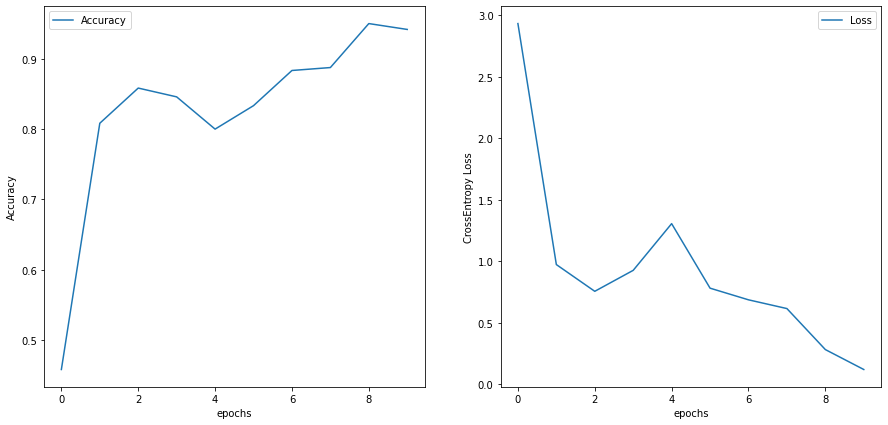

In [226]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Loss')
plt.xlabel('epochs')
plt.ylabel('CrossEntropy Loss')
plt.legend()

In [227]:
pred_labels=model.predict(x_test,batch_size=20)

In [228]:
test_labels=y_test
test_labels=np.array([np.argmax(i) for i in y_test])
pred_labels=np.array([np.argmax(i) for i in pred_labels])

In [ ]:
print(' Accuracy Of Model : ',np.sum((pred_labels-test_labels)==0)/len(test_labels))
i=0
print(' Accuracy in Class 0 (American_Goldfinch_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 1 (Red_headed_Woodpecker_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 2 (Marigold_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 3 (anthuriam_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 4 (frangipani_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 5 (Albatross_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)

In [ ]:
cm=confusion_matrix(test_labels,pred_labels)
cm

In [ ]:
cf=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
cf.plot()
plt.show()